In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
    
        for review in soup.find_all('div', class_='text_content'):
            review_text = review.get_text(separator=" ").strip()
            if '|' in review_text:
                review_text = review_text.split('|')[1].strip()  # Remove the part before '|'
            reviews.append(review_text)
    else:
        print(f"Failed to fetch page {i}. Status code: {response.status_code}")

print(f"Total reviews collected: {len(reviews)}")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Total reviews collected: 3822


In [5]:
# Create DataFrame from reviews
df = pd.DataFrame({'Review': reviews})
df

,Review
0,"On March 1st, I flew from Berlin to São Paulo ..."
1,The WORST customer experience! British Airways...
2,Had to cancel my flight months in advance due ...
3,Flight cancelled with no reason given less tha...
4,This is a route I fly regularly. Used first cl...
...,...
3817,YYZ to LHR - July 2012 - I flew overnight in p...
3818,LHR to HAM. Purser addresses all club passenge...
3819,My son who had worked for British Airways urge...
3820,London City-New York JFK via Shannon on A318 b...


In [6]:
#df["Review"]= df["Review"].str.split('|',expand=True)[1]
#df

In [7]:
# Function to clean text
def clean_text(text):
    if text is None:
        return ""
    # Remove HTML tags using regex
    cleaned_text = re.sub(r'<.*?>', '', text)
    # Remove extra spaces, newlines, and leading/trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    # Remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Apply cleaning function to 'Review' column
df['Cleaned_Review'] = df['Review'].apply(clean_text)
df

,Review,Cleaned_Review
0,"On March 1st, I flew from Berlin to São Paulo ...",on march st i flew from berlin to so paulo wit...
1,The WORST customer experience! British Airways...,the worst customer experience british airways ...
2,Had to cancel my flight months in advance due ...,had to cancel my flight months in advance due ...
3,Flight cancelled with no reason given less tha...,flight cancelled with no reason given less tha...
4,This is a route I fly regularly. Used first cl...,this is a route i fly regularly used first cla...
...,...,...
3817,YYZ to LHR - July 2012 - I flew overnight in p...,yyz to lhr july i flew overnight in premium...
3818,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenger...
3819,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3820,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon on a but h...


In [8]:
# Saving cleaned data to CSV
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

In [10]:
csv_file = os.path.join(data_folder, 'airline_reviews.csv')
df.to_csv(csv_file, index=False)

# Print success message
print(f"Data saved successfully to {csv_file}")

Data saved successfully to data\airline_reviews.csv


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\JAYESH
[nltk_data]     AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JAYESH
[nltk_data]     AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JAYESH
[nltk_data]     AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned_Review'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\JAYESH
[nltk_data]     AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JAYESH AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Review,Cleaned_Review,POS tagged
0,"On March 1st, I flew from Berlin to São Paulo ...",on march st i flew from berlin to so paulo wit...,"[(march, n), (st, n), (flew, v), (berlin, n), ..."
1,The WORST customer experience! British Airways...,the worst customer experience british airways ...,"[(worst, a), (customer, n), (experience, n), (..."
2,Had to cancel my flight months in advance due ...,had to cancel my flight months in advance due ...,"[(cancel, v), (flight, n), (months, n), (advan..."
3,Flight cancelled with no reason given less tha...,flight cancelled with no reason given less tha...,"[(flight, n), (cancelled, v), (reason, n), (gi..."
4,This is a route I fly regularly. Used first cl...,this is a route i fly regularly used first cla...,"[(route, n), (fly, v), (regularly, r), (used, ..."


In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Review,Cleaned_Review,POS tagged,Lemma
0,"On March 1st, I flew from Berlin to São Paulo ...",on march st i flew from berlin to so paulo wit...,"[(march, n), (st, n), (flew, v), (berlin, n), ...",march st fly berlin paulo ba encounter sever...
1,The WORST customer experience! British Airways...,the worst customer experience british airways ...,"[(worst, a), (customer, n), (experience, n), (...",bad customer experience british airway ba ef...
2,Had to cancel my flight months in advance due ...,had to cancel my flight months in advance due ...,"[(cancel, v), (flight, n), (months, n), (advan...",cancel flight month advance due change sched...
3,Flight cancelled with no reason given less tha...,flight cancelled with no reason given less tha...,"[(flight, n), (cancelled, v), (reason, n), (gi...",flight cancel reason give less h departure e...
4,This is a route I fly regularly. Used first cl...,this is a route i fly regularly used first cla...,"[(route, n), (fly, v), (regularly, r), (used, ...",route fly regularly use first class security...


In [14]:
df[['Review','Lemma']]

,Review,Lemma
0,"On March 1st, I flew from Berlin to São Paulo ...",march st fly berlin paulo ba encounter sever...
1,The WORST customer experience! British Airways...,bad customer experience british airway ba ef...
2,Had to cancel my flight months in advance due ...,cancel flight month advance due change sched...
3,Flight cancelled with no reason given less tha...,flight cancel reason give less h departure e...
4,This is a route I fly regularly. Used first cl...,route fly regularly use first class security...
...,...,...
3817,YYZ to LHR - July 2012 - I flew overnight in p...,yyz lhr july fly overnight premium economy c...
3818,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name b...
3819,My son who had worked for British Airways urge...,son work british airway urge fly british air...
3820,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon really n...


[nltk_data] Downloading package vader_lexicon to C:\Users\JAYESH
[nltk_data]     AHIRE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of Positive outcomes: 2192
Number of Negative outcomes: 1571
Number of Neutral outcomes: 59
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Alpha: {'alpha': 1.0}
Naive Bayes Sentiment Distribution:


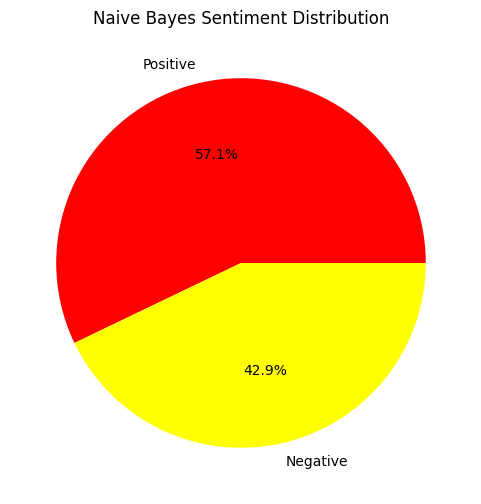

Confusion Matrix for Naive Bayes:


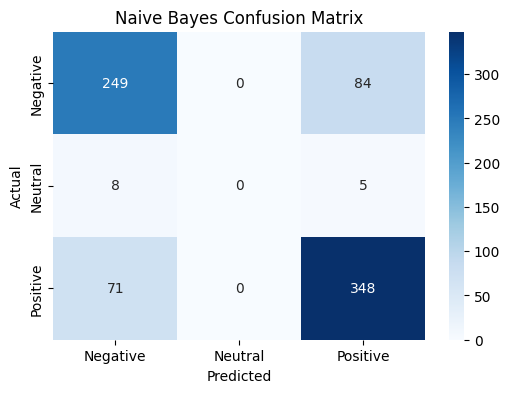

Naive Bayes Accuracy: 0.7803921568627451
Naive Bayes F1 Score: 0.7733
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.75      0.75       333
     Neutral       0.00      0.00      0.00        13
    Positive       0.80      0.83      0.81       419

    accuracy                           0.78       765
   macro avg       0.52      0.53      0.52       765
weighted avg       0.77      0.78      0.77       765



c:\Users\JAYESH AHIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAYESH AHIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAYESH AHIRE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [27]:
import pandas as pd
import os
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Function to classify sentiment using VADER
def vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis
df['VADER_Sentiment'] = df['Cleaned_Review'].apply(vader_sentiment)

# Print number of Positive, Negative, and Neutral outcomes
sentiment_counts = df['VADER_Sentiment'].value_counts()
print(f"Number of Positive outcomes: {sentiment_counts.get('Positive', 0)}")
print(f"Number of Negative outcomes: {sentiment_counts.get('Negative', 0)}")
print(f"Number of Neutral outcomes: {sentiment_counts.get('Neutral', 0)}")

# Prepare data for Naive Bayes classification
X = df['Cleaned_Review']
y = df['VADER_Sentiment']  # Use VADER sentiment as labels

# Encode sentiment labels
y = y.map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  # Define the grid of alpha values to search
nb = MultinomialNB()
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_vec, y_train)

print("Best Alpha:", grid_search.best_params_)

# Predict sentiment using Naive Bayes with best alpha
best_nb = grid_search.best_estimator_
y_pred_nb = best_nb.predict(X_test_vec)

# Convert numeric sentiment back to labels
def decode_sentiment(label):
    if label == 1:
        return 'Positive'
    elif label == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Create DataFrame for test set predictions
test_results = pd.DataFrame({'Review': X_test, 'Actual': y_test, 'Predicted_NB': y_pred_nb})
test_results['Predicted_NB'] = test_results['Predicted_NB'].apply(decode_sentiment)
test_results['Actual'] = test_results['Actual'].apply(decode_sentiment)

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(test_results['Actual'], test_results['Predicted_NB'])

# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

# Visualize the results using pie charts
def plot_pie_chart(data, title):
    sentiment_counts = data.value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
    plt.title(title)
    plt.show()

# Plotting the results
print("Naive Bayes Sentiment Distribution:")
plot_pie_chart(test_results['Predicted_NB'], 'Naive Bayes Sentiment Distribution')

print("Confusion Matrix for Naive Bayes:")
plot_confusion_matrix(conf_matrix_nb, 'Naive Bayes Confusion Matrix')

# Compare accuracy and classification report
accuracy_nb = accuracy_score(test_results['Actual'], test_results['Predicted_NB'])
classification_report_nb = classification_report(test_results['Actual'], test_results['Predicted_NB'], target_names=['Negative', 'Neutral', 'Positive'])

print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Calculate F1 score
f1_nb = f1_score(test_results['Actual'], test_results['Predicted_NB'], average='weighted')
print(f"Naive Bayes F1 Score: {f1_nb:.4f}")

print(f"Naive Bayes Classification Report:\n{classification_report_nb}")

